In [1]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')

In [ ]:
import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

import os
os.getcwd()

import feature_extractor



In [ ]:
from benji_girgs import utils, generation, points, fitting, mcmc
import os
import glob
import pandas as pd
import networkit

import networkit as nk

from girg_sampling import girgs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt

import do_feature_extract
import networkx as nx

import pickle


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import importlib
importlib.reload(mcmc)

In [94]:
def BIC_comparison(name):

    gd = list(filter(lambda x: x['Name']  == name, do_feature_extract.graph_dicts))[0]
    in_path = gd['FullPath']
    in_path
    name = gd['Name']
    g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
    g = utils.get_largest_component(g)
    # nk.overview(g)
    print(g.numberOfNodes())
    n = g.numberOfNodes()


    pickle_path = '../../MCMC_run_failure_probs_0p3/pickles/'
    with open(pickle_path + name + '-1d' + '.pkl', 'rb') as file:
        MC1 = pickle.load(file)


    fe = feature_extractor.FeatureExtractor([])
    weights = utils.graph_degrees_to_weights(g)
    c, probs_cl = generation.chung_lu_fit_c(g, weights)
    chung_lu_ll = generation.g_probs_to_ll(g, probs_cl)
    print(f'chunglu LL: {chung_lu_ll}')
    er_ll = generation.ER_ll(g)
    print(f'er LL: {er_ll}')

    g_cl = fe.fit_chung_lu(g)
    g_cl_nx = nk.nxadapter.nk2nx(g_cl)
    A_cl = nx.linalg.adjacency_matrix(g_cl_nx).todense()
    out, percent_edges_captured, percent_fake_edges_wrong = mcmc.CM(MC1.A, A_cl)
    print(out)
    print(percent_edges_captured, percent_fake_edges_wrong)

    print('------- MC1 ---------')
    g_out, A_out, out, percent_edges_captured, percent_fake_edges_wrong = MC1.get_CM(MC1.A)
    print(out)
    print(percent_edges_captured, percent_fake_edges_wrong)

    ll, expected_num_edges = MC1.calculate_ll()
    ll, expected_num_edges

    print(f'll: {ll}, expected_num_edges: {expected_num_edges}')
    print(f'BIC adjusted ll: {ll - n * np.log(g.numberOfEdges())/2}')

    ll, expected_num_edges = MC1.calculate_ll(mixin_probs=probs_cl, mixin_chance=0.5)
    ll, expected_num_edges
    print('With Mixin')
    print(f'll: {ll}, expected_num_edges: {expected_num_edges}')
    print(f'BIC adjusted ll: {ll - n * np.log(g.numberOfEdges())/2}')


2235
chunglu LL: -670400.0038853943
er LL: -3460876.941063832
[[   6138  175770]
 [ 175780 4637537]]
0.03374233128834356 0.9662595235215866
------- MC1 ---------
[[  33938  147970]
 [ 146066 4667251]]
0.1865668359830244 0.8114597453389925
ll: -666296.6180079939, expected_num_edges: 90894.8504074559
BIC adjusted ll: -679056.3549978565
With Mixin
ll: -621819.5038286954, expected_num_edges: 90956.97075959403
BIC adjusted ll: -634579.240818558


In [98]:
for name in df.name.unique()[:5]:
    print(f'------------------- {name} -------------------')
    BIC_comparison(name)
    print()

------------------- socfb-Caltech36 -------------------
762
chunglu LL: -102799.26666881885
er LL: -401943.57335746853
[[  1904  31398]
 [ 31308 516034]]
0.0571737433187196 0.9426713236179695
------- MC1 ---------
[[  7534  25768]
 [ 25550 521792]]
0.22623265869917722 0.7722766291863137
ll: -117566.84752312736, expected_num_edges: 16648.233767084814
BIC adjusted ll: -121270.25345907378
With Mixin
ll: -100517.82473571683, expected_num_edges: 16668.09126108877
BIC adjusted ll: -104221.23067166324

------------------- socfb-Reed98 -------------------
962
chunglu LL: -128476.06068462234
er LL: -640802.091778406
[[  1480  36144]
 [ 36346 851474]]
0.03933659366361897 0.9608734732723524
------- MC1 ---------
[[  6766  30858]
 [ 29878 857942]]
0.17983202211354454 0.8153585853072809
ll: -143666.147283378, expected_num_edges: 18751.590090752463
BIC adjusted ll: -148400.26965029223
With Mixin
ll: -126270.22597103451, expected_num_edges: 18799.132046690705
BIC adjusted ll: -131004.34833794874

---

In [34]:
BIC_comparison('socfb-Oberlin44')

Network Properties:
nodes, edges			2920, 89912
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.021097
clustering coefficient		0.263398
min/max/avg degree		1, 478, 61.583562
degree assortativity		0.050334
number of connected components	1
size of largest component	2920 (100.00 %)
------- MC1 ---------
[[  20546  159278]
 [ 157362 8189214]]
0.11425616158021176 0.8845133439755379
ll: -843824.5316067616, expected_num_edges: 89972.59207522731
BIC adjusted ll: -860478.1481788309
------- MC2 ---------
[[  22540  157284]
 [ 156206 8190370]]
0.1253447815641961 0.8738992760677162
ll: -874920.2473609605, expected_num_edges: 90744.02767540205
BIC adjusted ll: -908227.4805050989
chunglu LL: -746717.0105372074
er LL: -5908026.13055895
[[  20438  159386]
 [ 157554 8189022]]
0.11365557433935404 0.8851746145894197


In [35]:
BIC_comparison('socfb-Reed98')

Network Properties:
nodes, edges			962, 18812
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.040697
clustering coefficient		0.318360
min/max/avg degree		1, 313, 39.110187
degree assortativity		0.024395
number of connected components	1
size of largest component	962 (100.00 %)
------- MC1 ---------
[[  6696  30928]
 [ 30154 857666]]
0.17797150754837338 0.8182903663500678
ll: -143629.71390379162, expected_num_edges: 18918.418186406303
BIC adjusted ll: -148363.83627070585
------- MC2 ---------
[[  7248  30376]
 [ 29892 857928]]
0.19264299383372316 0.8048465266558966
ll: -144503.29811104143, expected_num_edges: 18882.265613299176
BIC adjusted ll: -153971.5428448699
chunglu LL: -128476.06068462232
er LL: -640802.091778406
[[  6886  30738]
 [ 30338 857482]]
0.18302147565383797 0.8150118203309693


In [95]:
import pickle
fn = '../../MCMC_run_failure_probs_0p3/pickles'
outputs = []

for path in os.listdir(fn):
    pickle_path = fn + '/' + path
    print(pickle_path)
    try:
        with open(pickle_path, 'rb') as file:
            MC = pickle.load(file)
    except Exception as e:
        print(e)
        continue
    foo = np.mean(MC.lls[-len(MC.lls)//10:])
    outputs.append((path, foo))

df = pd.DataFrame(outputs)
df.columns = ['name', 'll']

df['d'] = df['name'].apply(lambda x: int(x.split('-')[2][0]))
df['name'] = df['name'].apply(lambda x: x.split('-')[0] + '-' + x.split('-')[1])

../../MCMC_run_failure_probs_0p3/pickles/socfb-Caltech36-1d.pkl
../../MCMC_run_failure_probs_0p3/pickles/socfb-Caltech36-2d.pkl
../../MCMC_run_failure_probs_0p3/pickles/socfb-Caltech36-3d.pkl
../../MCMC_run_failure_probs_0p3/pickles/socfb-Reed98-1d.pkl
../../MCMC_run_failure_probs_0p3/pickles/socfb-Reed98-2d.pkl
../../MCMC_run_failure_probs_0p3/pickles/socfb-Reed98-3d.pkl
../../MCMC_run_failure_probs_0p3/pickles/socfb-Haverford76-1d.pkl
../../MCMC_run_failure_probs_0p3/pickles/socfb-Haverford76-2d.pkl
../../MCMC_run_failure_probs_0p3/pickles/socfb-Haverford76-3d.pkl
../../MCMC_run_failure_probs_0p3/pickles/socfb-Simmons81-1d.pkl
../../MCMC_run_failure_probs_0p3/pickles/socfb-Simmons81-2d.pkl
../../MCMC_run_failure_probs_0p3/pickles/socfb-Simmons81-3d.pkl
../../MCMC_run_failure_probs_0p3/pickles/socfb-Swarthmore42-1d.pkl
../../MCMC_run_failure_probs_0p3/pickles/socfb-Swarthmore42-2d.pkl
../../MCMC_run_failure_probs_0p3/pickles/socfb-Swarthmore42-3d.pkl
../../MCMC_run_failure_probs_0p3/p

In [41]:
df.name.unique()

array(['socfb-Caltech36', 'socfb-Reed98', 'socfb-Haverford76',
       'socfb-Simmons81', 'socfb-Swarthmore42', 'socfb-Amherst41',
       'socfb-Bowdoin47', 'socfb-Hamilton46', 'socfb-Trinity100',
       'socfb-USFCA72', 'socfb-Williams40', 'socfb-Oberlin44',
       'socfb-Smith60', 'socfb-Wellesley22', 'socfb-Middlebury45',
       'socfb-Vassar85', 'socfb-Pepperdine86', 'socfb-Colgate88',
       'socfb-Santa74', 'socfb-Wesleyan43'], dtype=object)

In [47]:
import warnings
warnings.filterwarnings("ignore")

for i, name in enumerate(df.name.unique()):
    print(f'------------------- {name} -------------------')
    BIC_comparison(name)

------------------- socfb-Caltech36 -------------------
762
------- MC1 ---------
ll: -117566.84752312736, expected_num_edges: 16648.233767084814
BIC adjusted ll: -121270.25345907378
------- MC2 ---------
ll: -115235.23489853858, expected_num_edges: 16586.76621488568
BIC adjusted ll: -122642.04677043139
chunglu LL: -102799.26666881886
er LL: -401943.57335746853
[[  7420  25882]
 [ 25314 522028]]
0.22280944087442195 0.7733243722123786
------------------- socfb-Reed98 -------------------
962
------- MC1 ---------
ll: -143666.147283378, expected_num_edges: 18751.590090752463
BIC adjusted ll: -148400.26965029223
------- MC2 ---------
ll: -144535.1262916044, expected_num_edges: 18744.00104248041
BIC adjusted ll: -154003.37102543286
chunglu LL: -128476.06068462232
er LL: -640802.091778406
[[  6660  30964]
 [ 29640 858180]]
0.17701467148628536 0.8165289256198347
------------------- socfb-Haverford76 -------------------
1446
------- MC1 ---------
ll: -398936.9925716101, expected_num_edges: 595

FileNotFoundError: [Errno 2] No such file or directory: '../../MCMC_run_failure_probs_0p3/pickles/socfb-Wesleyan43-2d.pkl'

In [7]:
gd = list(filter(lambda x: x['Name'] == 'socfb-Reed98', do_feature_extract.graph_dicts))[0]
in_path = gd['FullPath']
in_path
name = gd['Name']
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()

Network Properties:
nodes, edges			962, 18812
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.040697
clustering coefficient		0.318360
min/max/avg degree		1, 313, 39.110187
degree assortativity		0.024395
number of connected components	1
size of largest component	962 (100.00 %)


In [99]:
import pickle

name='socfb-Swarthmore42'

pickle_path = '../../MCMC_run_failure_probs_0p3/pickles/'
with open(pickle_path + name + '-1d' + '.pkl', 'rb') as file:
    MC1 = pickle.load(file)

MC1.calibrate_const()

with open(pickle_path + name + '-2d' + '.pkl', 'rb') as file:
    MC2 = pickle.load(file)

MC2.calibrate_const()

In [101]:
MC2.g.numberOfNodes()

1657

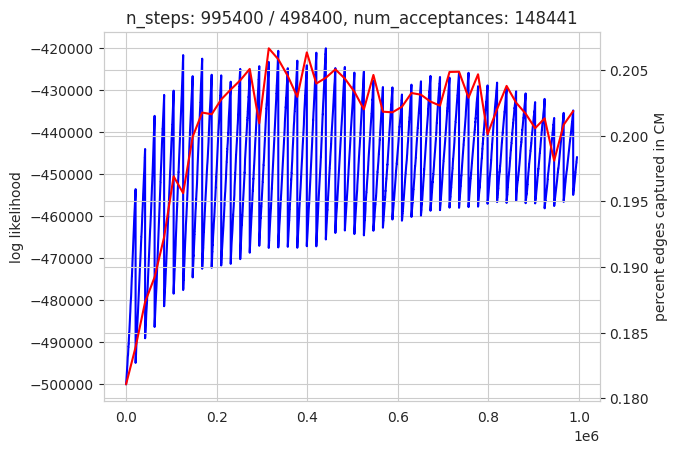

In [102]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

MC2.plot_ll(MC1.num_steps, CM=True)

(array([[23.,  7.,  4.,  2.,  1.,  2.,  3.,  1.,  3.,  3.,  2.,  2.,  2.,
          1.,  2.,  2.,  0.,  3.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
          1.,  0.,  1.,  0.],
        [ 4.,  4.,  3.,  1.,  2.,  4.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,
          2.,  1.,  0.,  1.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,
          0.,  0.,  0.,  0.],
        [ 3.,  2.,  5.,  4.,  4.,  2.,  4.,  2.,  3.,  1.,  0.,  3.,  2.,
          3.,  2.,  2.,  1.,  3.,  1.,  0.,  2.,  1.,  1.,  0.,  1.,  0.,
          0.,  0.,  1.,  0.],
        [ 5.,  6.,  6.,  5.,  3.,  2.,  5.,  2.,  3.,  5.,  0.,  3.,  0.,
          3.,  1.,  0.,  0.,  0.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
          0.,  0.,  0.,  0.],
        [ 2.,  3.,  3.,  1.,  3.,  2.,  2.,  2.,  2.,  3.,  1.,  3.,  2.,
          2.,  1.,  1.,  3.,  1.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
          0.,  0.,  0.,  0.],
        [ 7.,  1.,  2.,  4.,  2.,  2.,  2.,  4.,  2.,  1.,  0.,  2.,  3.,
          0.,  2.,  1.,  0.,  0.,  0

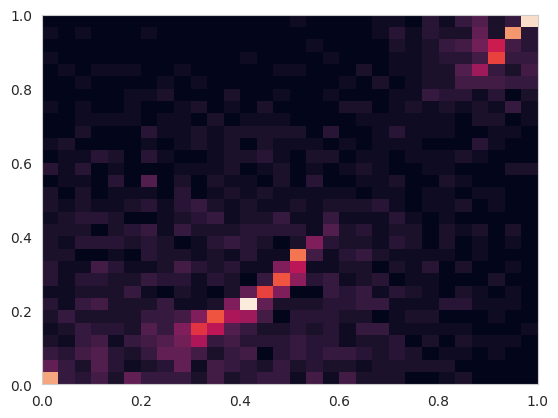

In [103]:
plt.hist2d(MC2.pts[:, 0], MC2.pts[:, 1], bins=30)

In [121]:
alpha = MC2.alpha
const = MC2.const
i=1

# _, _, _, _, _, MC = mcmc.g_initialised_mcmc(g, alpha=alpha, const=const, pts_d=i+1,                                                                 diffmap_init=False, graph_name=name + f'-{i+1}d',                                                       failure_prob=0.3)

_, _, _, _, _, MC_dm = mcmc.g_initialised_mcmc(g, alpha=alpha, const=const, pts_d=i+1,                                                                 diffmap_init=True, graph_name=name + f'-{i+1}d',                                                       failure_prob=0.3)

calibrating const
const: 0.04532197721532701, expected_num_edges: 59946.8871166855
const: 0.014222540591893745, expected_num_edges: 32130.768001902805
const: 0.008327047570069298, expected_num_edges: 23147.950971812304
const: 0.006767269339687878, expected_num_edges: 20265.172586641856
const: 0.006282002794396346, expected_num_edges: 19308.27407722848
const: 0.006120538588560746, expected_num_edges: 18982.81673054486
const: 0.006065462969082773, expected_num_edges: 18871.068299147813


In [118]:
MC_temp1.calculate_ll()
MC_temp2.calculate_ll()

(-169331.2210693177, 18810.98512856123)

(-165513.67828647894, 18832.78446100949)

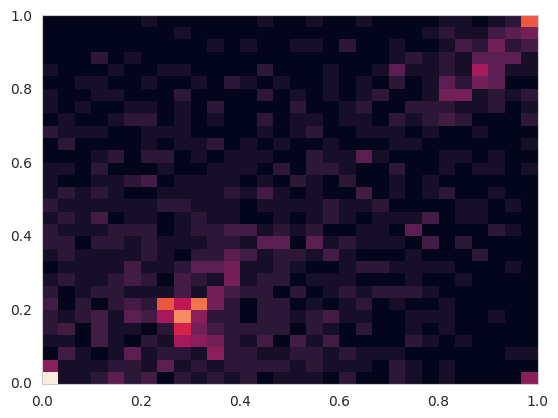

In [129]:
%matplotlib inline
_ = plt.hist2d(MC_dm.pts[:, 0], MC_dm.pts[:, 1], bins=30)

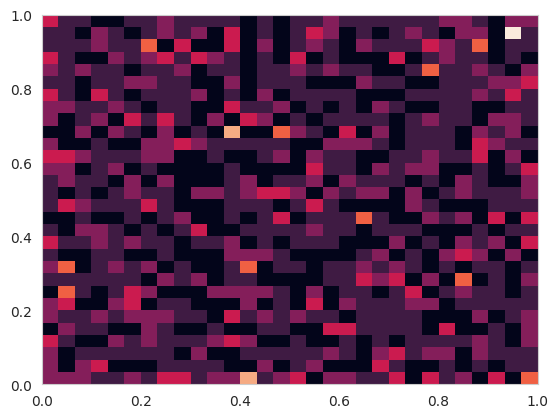

In [138]:
%matplotlib inline
_ = plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [143]:
%matplotlib notebook
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.ion()
fig.show()
fig.canvas.draw()

<IPython.core.display.Javascript object>

In [144]:
MC.plot_ll(MC.num_steps, CM=True)

In [133]:
MC.run_pool(800000, pool_size=15, jobs_per_worker=200, plot_every=20000)

801000it [05:14, 2547.45it/s]                            


In [145]:
%matplotlib notebook
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.ion()
fig.show()
fig.canvas.draw()

<IPython.core.display.Javascript object>

In [146]:
MC_dm.plot_ll(MC_dm.num_steps, CM=True)

In [147]:
MC_dm.g.numberOfNodes()

962

In [148]:
MC_dm.pts.shape

(962, 2)

In [127]:
MC_dm.run_pool(100000, pool_size=15, jobs_per_worker=80, plot_every=5000)

100800it [01:11, 1403.02it/s]                           


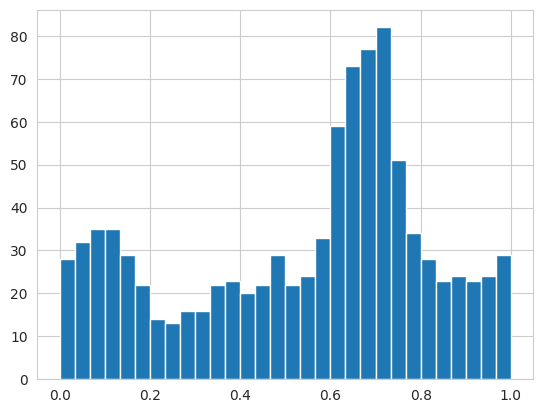

In [22]:
%matplotlib inline
_ = plt.hist(MC.pts[:, 0], bins=30)

In [78]:
fe = feature_extractor.FeatureExtractor([])
cl = fe.fit_chung_lu(g)

weights = utils.graph_degrees_to_weights(g)
c, probs_cl = generation.chung_lu_fit_c(g, weights)
chung_lu_ll = generation.g_probs_to_ll(g, probs_cl)
print(f'chunglu LL: {chung_lu_ll}')
er_ll = generation.ER_ll(g)
print(f'er LL: {er_ll}')

g_cl = fe.fit_chung_lu(g)
gnx = nk.nxadapter.nk2nx(cl)
A_cl = nx.linalg.adjacency_matrix(gnx).todense()
out, percent_edges_captured, percent_fake_edges_wrong = mcmc.CM(A, A_cl)
print(out)
print(percent_edges_captured, percent_fake_edges_wrong)

chunglu LL: -128476.06068462232
er LL: -640802.091778406
[[  1480  36144]
 [ 36346 851474]]
0.03933659366361897 0.9608734732723524


In [26]:
MC.calculate_ll()

(-143216.9045256718, 18811.572108576074)

In [89]:
self = MC
ll = 0
expected_num_edges = 0
P = np.zeros_like(A, dtype=np.float64)
L = np.zeros_like(A, dtype=np.float64)

for u_index in range(self.n):
    eps = 1e-7
    p_u_to_vs = generation.get_probs_u(self.weights, self.pts, self.alpha, self.const_in, u_index)
    p_u_to_vs *= (1 - self.failure_prob)
    ##### Mix in CL
    p_u_to_vs = 0.5*p_u_to_vs + 0.5*probs_cl[u_index]
    #####
    expected_num_edges += p_u_to_vs.sum()
    p_u_to_vs = np.clip(p_u_to_vs, eps, 1 - eps)
    P[:, u_index] = p_u_to_vs
    u_ll = self.p_u_to_vs_to_ll(self.g, u_index, p_u_to_vs)
    ###
    out = 0
    n = g.numberOfNodes()
    assert n == len(p_u_to_vs)
    mask = np.ones(n, dtype=bool)
    for nhb in g.iterNeighbors(u_index):
        mask[nhb] = False
        out += np.log(p_u_to_vs[nhb])
    L[~mask, u_index] = np.log(p_u_to_vs[~mask])
    mask[u_index] = False
    out += np.log(1 - p_u_to_vs[mask]).sum()
    L[mask, u_index] = np.log(1 - p_u_to_vs[mask])
    ll += u_ll

print(ll, expected_num_edges/2)

-126121.13094076623 18823.635308670997


In [84]:
g.numberOfEdges()

18812

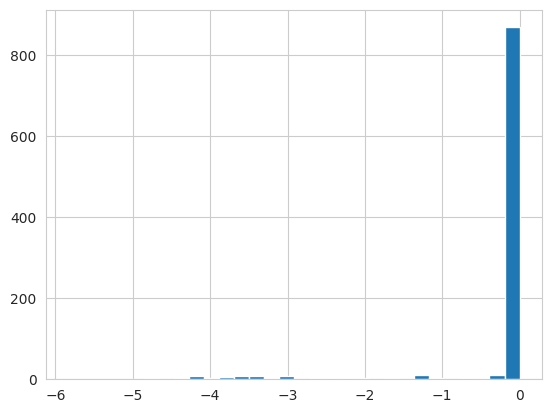

In [59]:
%matplotlib inline
_ = plt.hist(L[:, 0], bins=30)

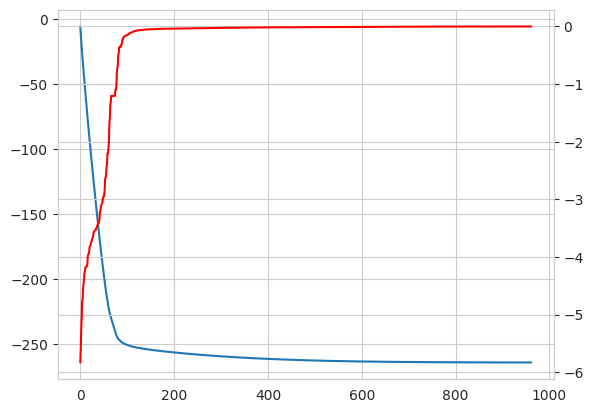

In [66]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(np.cumsum(sorted(L[:, 0])))
ax2.plot(sorted(L[:,0]), color='r')

In [67]:
mask

73

In [79]:
probs_cl.shape

(962, 962)

In [80]:
u_index = 0
eps = 1e-7
# p_u_to_vs = generation.get_probs_u(self.weights, self.pts, self.alpha, self.const_in, u_index)
p_u_to_vs = probs_cl[u_index]
p_u_to_vs *= (1 - self.failure_prob)
expected_num_edges += p_u_to_vs.sum()
p_u_to_vs = np.clip(p_u_to_vs, eps, 1 - eps)
# P[:, u_index] = p_u_to_vs
u_ll = self.p_u_to_vs_to_ll(self.g, u_index, p_u_to_vs)
###
out = 0
n = g.numberOfNodes()
assert n == len(p_u_to_vs)
mask = np.ones(n, dtype=bool)
for nhb in g.iterNeighbors(u_index):
    mask[nhb] = False
    out += np.log(p_u_to_vs[nhb])
# L[~mask, u_index] = np.log(p_u_to_vs[~mask])
mask[u_index] = False
out += np.log(1 - p_u_to_vs[mask]).sum()
# L[mask, u_index] = np.log(1 - p_u_to_vs[mask])
# ll += u_ll

<Figure size 640x480 with 0 Axes>

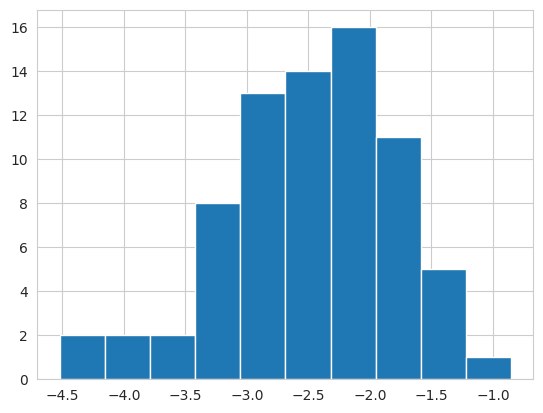

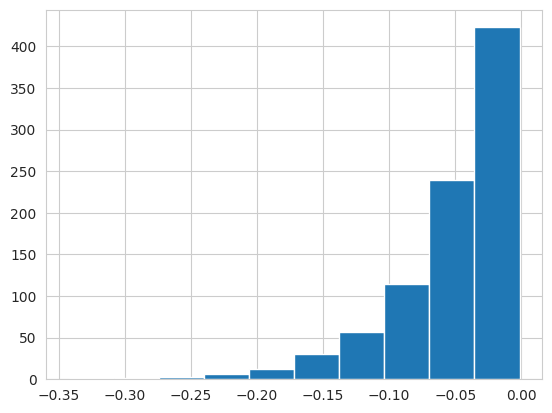

In [81]:
_ = plt.hist(np.log(p_u_to_vs[~mask]))
plt.figure()
_ = plt.hist(np.log(1 - p_u_to_vs[mask]))

<Figure size 640x480 with 0 Axes>

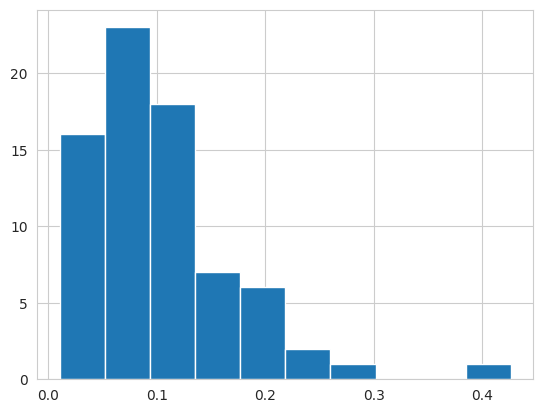

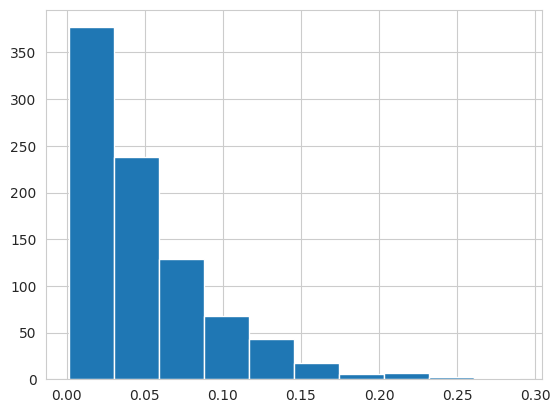

In [82]:
_ = plt.hist(p_u_to_vs[~mask])
plt.figure()
_ = plt.hist(p_u_to_vs[mask])

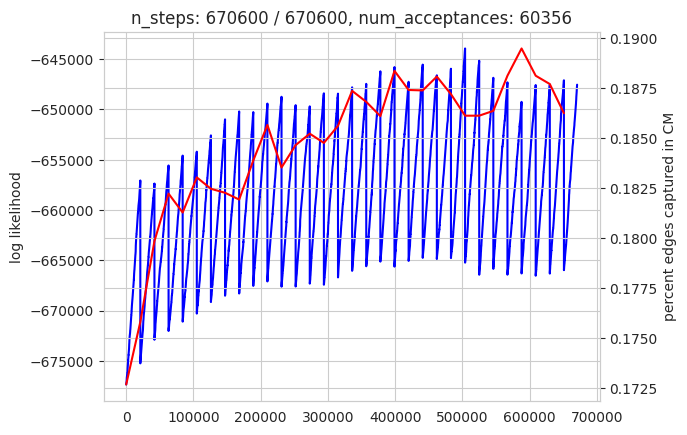

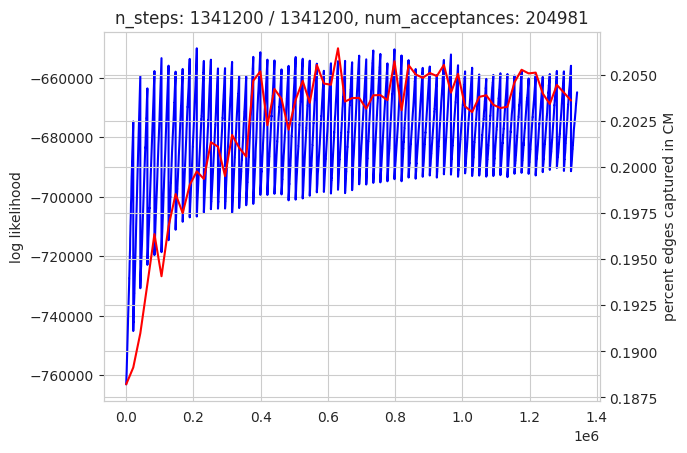

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

MC1.plot_ll(MC1.num_steps, CM=True)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

MC2.plot_ll(MC2.num_steps, CM=True)

In [15]:
g_degs = [g.degree(i) for i in range(g.numberOfNodes())]

argsorted = np.argsort(g_degs)[::-1]
fe = feature_extractor.FeatureExtractor([])

cl = fe.fit_chung_lu(g)
gnx = nk.nxadapter.nk2nx(cl)
A_cl = nx.linalg.adjacency_matrix(gnx).todense()
# A_cl = A_cl[:, argsorted][argsorted, :]

out, p1, p2 = mcmc.CM(MC1.A[:, argsorted][argsorted, :], A_cl)
print(p1, p2)
print(out)

weights = utils.graph_degrees_to_weights(g)
c, probs = generation.chung_lu_fit_c(g, weights)
chung_lu_ll = generation.g_probs_to_ll(g, probs)
print(f'chunglu LL: {chung_lu_ll}')
er_ll = generation.ER_ll(g)
print(f'er LL: {er_ll}')

0.09493810057831431 0.9050671181521345
[[  17270  164638]
 [ 164648 4648669]]
chunglu LL: -670400.0038853943
er LL: -3460876.941063832


In [16]:
self = MC1
g_out, A_out, out, percent_edges_captured, percent_fake_edges_wrong = self.get_CM(self.A)
print(out)
print(percent_edges_captured, percent_fake_edges_wrong)

ll, expected_num_edges = MC1.calculate_ll()
ll, expected_num_edges

../benji_girgs/generation.py:125: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:586: RuntimeWarning: divide by zero encountered in true_divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:587: RuntimeWarning: divide by zero encountered in true_divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


[[  34192  147716]
 [ 145568 4667749]]
0.18796314620577434 0.8097908322207388


In [20]:
ll, expected_num_edges = MC1.calculate_ll()
ll, expected_num_edges

(-666249.1723944361, 91118.34111135668)

In [25]:
ll - n * np.log(n)

-683485.4845876876